In [1]:
import json
from pybbn.graph.dag import Bbn
from pybbn.pptc.inferencecontroller import InferenceController
from pybbn.graph.jointree import EvidenceBuilder
import random
import time

def get_jt():
    with open('singly-bbn.json', 'r') as f:
        bbn = Bbn.from_dict(json.loads(f.read()))
        jt = InferenceController.apply(bbn)
        return jt
    
def get_evidence(jt, name, val):
    return EvidenceBuilder() \
        .with_node(jt.get_bbn_node_by_name(name)) \
        .with_evidence(val, 1.0) \
        .build()
    
def get_evidences(jt):
    max_nodes = random.randint(1, 20)
    
    ids = list(node_ids)
    random.shuffle(ids)
    
    ids = ids[:max_nodes]
    ids = {i: random.choice(['state0', 'state1']) for i in ids}
    ids = [get_evidence(jt, n, v) for n, v in ids.items()]
    
    return ids

def do_inference():
    # get jt
    start = time.time()
    jt = get_jt()
    
    stop = time.time()
    j_diff = stop - start
    
    # get evidence
    start = time.time()
    evidences = get_evidences(jt)
    
    stop = time.time()
    e_diff = stop - start
    
    # clear evidence
    start = time.time()
    jt.unobserve_all()
    
    stop = time.time()
    c_diff = stop - start
    
    # update evidence
    start = time.time()
    jt.update_evidences(evidences)
    
    stop = time.time()
    u_diff = stop - start
    
    return len(evidences), j_diff, e_diff, c_diff, u_diff
    
node_ids = [f'{n}' for n in range(900)]

In [2]:
import pandas as pd

df = pd.DataFrame([do_inference() for _ in range(1_000)], columns=['n', 'j_time', 'e_time', 'c_time', 'u_time'])
df.shape

(1000, 5)

In [11]:
df.head(10)

,n,j_time,e_time,c_time,u_time
0,7,3.379290,0.002273,0.003768,0.049996
1,11,3.466310,0.003508,0.003470,0.049598
2,6,3.378548,0.002049,0.003458,0.049155
3,1,3.440225,0.000638,0.003800,0.049173
4,8,3.423014,0.002595,0.003693,0.048544
5,18,3.622098,0.006198,0.003862,0.055082
6,14,3.745868,0.004711,0.003689,0.055519
7,19,3.691412,0.005895,0.003974,0.055685
8,20,3.762516,0.006641,0.003905,0.055874
9,8,3.725578,0.002953,0.003951,0.057224


In [12]:
df.mean()

n         10.620000
j_time     3.384668
e_time     0.003442
c_time     0.003574
u_time     0.050194
dtype: float64

In [13]:
df.describe()

,n,j_time,e_time,c_time,u_time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.620000,3.384668,0.003442,0.003574,0.050194
std,5.785938,0.063893,0.001667,0.000109,0.001611
min,1.000000,3.325093,0.000638,0.003458,0.048544
25%,5.750000,3.343699,0.002046,0.003522,0.049380
50%,11.000000,3.360129,0.003492,0.003536,0.049608
75%,16.000000,3.406066,0.004915,0.003585,0.050305
max,20.000000,3.762516,0.006641,0.004526,0.059810


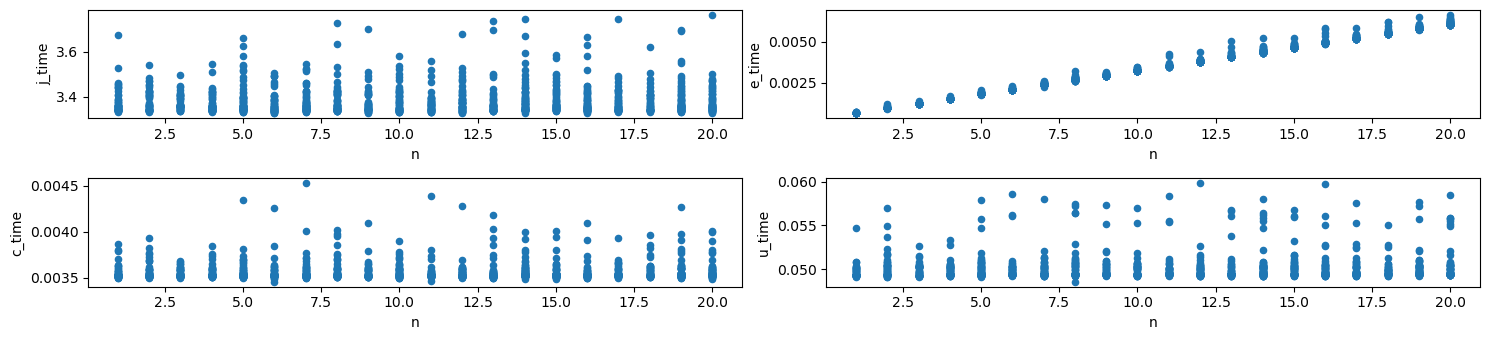

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 2, figsize=(15, 3.5))
ax = np.ravel(ax)

df.plot(kind='scatter', x='n', y='j_time', ax=ax[0])
df.plot(kind='scatter', x='n', y='e_time', ax=ax[1])
df.plot(kind='scatter', x='n', y='c_time', ax=ax[2])
df.plot(kind='scatter', x='n', y='u_time', ax=ax[3])

plt.tight_layout()

In [15]:
from sklearn.linear_model import LinearRegression

X = df[['n']]
y = df['j_time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(3.378273005376205, array([0.00060221]))

In [16]:
X = df[['n']]
y = df['e_time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(0.0003893059459959547, array([0.00028749]))

In [17]:
X = df[['n']]
y = df['c_time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(0.003566789170592686, array([6.91187463e-07]))

In [18]:
X = df[['n']]
y = df['u_time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(0.049962121512487814, array([2.17873698e-05]))